In [1]:
import numpy as np
import pandas as pd
from fake_data_gen_funcs import *
# Function to calculate signal strength
# def signal_strength(point):
#     lambda_wave = 1  # meter
#     r = np.sqrt((point[:,0]**2 + point[:,1]**2 + point[:,2]**2))  # Calculate radius
#     rssi = 20 * np.log10(4 * np.pi * r / lambda_wave)  # RSSI calculation
#     return np.round(rssi, 1)

# # Function to generate points on a sphere
# def points_for_sphere(r, theta, phi, offset_x=0, offset_y=0, offset_z=0):
#     x = r * np.sin(theta) * np.cos(phi) + offset_x
#     y = r * np.sin(theta) * np.sin(phi) + offset_y
#     z = r * np.cos(theta) + offset_z
#     return np.array([x, y, z])

# Generate test data
theta = np.linspace(-np.pi, np.pi, 50)
phi = np.linspace(-2 * np.pi, 2 * np.pi, 50)
r_values = np.arange(1, 1000)

theta_grid, phi_grid = np.meshgrid(theta, phi, indexing='ij')
theta_flat = theta_grid.ravel()
phi_flat = phi_grid.ravel()

vals = []

for r in r_values:
    points = points_for_sphere(r, theta_flat, phi_flat)
    vals.append(points.T)  # Append the points for this radius

vals = np.concatenate(vals, axis=0)  # Stack results

# Create DataFrame
df = pd.DataFrame(vals, columns=['X', 'Y', 'Z'])

# Calculate RSSI values
df['RSSI'] = signal_strength(vals)

# Save to CSV
df.to_csv('Fake_Calibration_Data.csv', index=False)

# Read data from CSV
df = pd.read_csv('Fake_Calibration_Data.csv')

# Recalculate radius
df['radius'] = np.sqrt(df.X**2 + df.Y**2 + df.Z**2)

# Recalculate RSSI and compare
calculated_rssi = np.round(20 * np.log10(4 * np.pi * df['radius']), 1)

# Use np.isclose to compare the recalculated RSSI with the saved one
comparison = np.isclose(calculated_rssi, df['RSSI'], atol=1e-1)



In [2]:
 import matplotlib.pyplot as plt

# a = df[np.round(df.Z) == np.round(0.096023)]
plt.scatter(a.X[0:-1],a.Y[0:-1],c=a.RSSI[0:-1])
plt.colorbar()

In [3]:
df

,X,Y,Z,RSSI,radius
0,-1.224647e-16,-2.999520e-32,-1.0,22.0,1.0
1,-1.184595e-16,-3.106373e-17,-1.0,22.0,1.0
2,-1.067058e-16,-6.009557e-17,-1.0,22.0,1.0
3,-8.797242e-17,-8.519654e-17,-1.0,22.0,1.0
4,-6.348478e-17,-1.047248e-16,-1.0,22.0,1.0
...,...,...,...,...,...
2497495,6.342130e-14,-1.046201e-13,-999.0,82.0,999.0
2497496,8.788445e-14,-8.511134e-14,-999.0,82.0,999.0
2497497,1.065991e-13,-6.003547e-14,-999.0,82.0,999.0
2497498,1.183410e-13,-3.103266e-14,-999.0,82.0,999.0


Starting position: (10, 5, 15)
Ending position: (296.8032839973342, 210.19317925382083, 62.66206875154232)


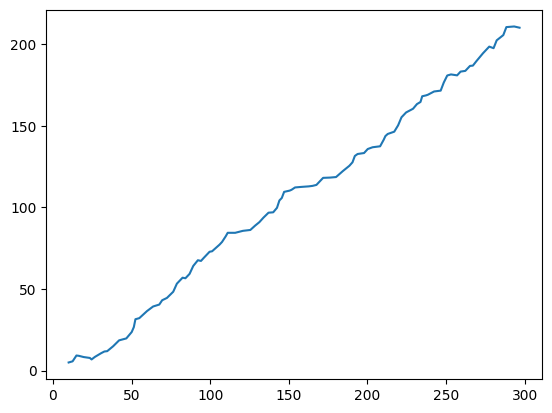

In [4]:
import random
import matplotlib.pyplot as plt

def three_d_random_walk(start_x, start_y, start_z, num_steps):
    """
    Simulates a 3D random walk with a step radius of 5.

    Args:
      start_x: Starting x-coordinate.
      start_y: Starting y-coordinate.
      start_z: Starting z-coordinate.
      num_steps: Number of steps in the walk.

    Returns:
      A list of tuples representing the (x, y, z) coordinates at each step.
    """
    walk = [(start_x, start_y, start_z)]
    for _ in range(num_steps):
        # Generate a random direction vector within a radius of 5
        dx = random.uniform(1, 5) # biasing the walk to the right
        dy = random.uniform(-1, 5)
        dz = random.uniform(-5, 5)

        # Update the current position
        new_x = walk[-1][0] + dx
        new_y = walk[-1][1] + dy
        new_z = np.abs(walk[-1][2] + dz)

        # Append the new position to the walk
        walk.append((new_x, new_y, new_z))

    return walk

# Example usage
x = 10
y = 5
z = 15
steps = 100


walk_path = three_d_random_walk(x, y, z, steps)


df = pd.DataFrame(walk_path,columns=['X','Y','Z'])

plt.plot(np.array(df.X),np.array(df.Y))



# Print the starting and ending positions
print(f"Starting position: ({x}, {y}, {z})")
print(f"Ending position: {walk_path[-1]}")

# You can further analyze the walk path here (optional)


In [5]:
station_1 = np.array([0,0,0])
station_2 = np.array([0,-200,0])
station_3 = np.array([100*np.sqrt(3),-100,0])

random_walk_strengths = []

for i in range(len(walk_path)):
    random_walk_strengths.append(find_multiple_detection_strengths(np.array(walk_path[i]),station_1,station_2,station_3))

In [6]:
df = pd.DataFrame(random_walk_strengths,columns=['Station 1','Station 2','Station 3'])
df1 = pd.DataFrame(walk_path,columns=['X','Y','Z'])

df.to_csv('Random_Walk_Detections.csv')
df1.to_csv('Random_Walk.csv')

In [7]:
df

,Station 1,Station 2,Station 3
0,47.0,68.0,68.0
1,49.0,68.0,68.0
2,51.0,68.0,68.0
3,51.0,68.0,68.0
4,52.0,68.0,68.0
...,...,...,...
96,73.0,76.0,72.0
97,73.0,76.0,72.0
98,73.0,76.0,73.0
99,73.0,76.0,73.0


In [8]:
import numpy as np 

x = np.ones([100,1]) * 150
y = np.linspace(200,-200,100)
z = np.ones([100,1]) * 20

staright_line_detect = np.column_stack([x,y,z])


straight_line_strengths = []

for i in range(len(staright_line_detect)):
    straight_line_strengths.append(find_multiple_detection_strengths(np.array(staright_line_detect[i]),station_1,station_2,station_3))

In [9]:
y

array([ 200.        ,  195.95959596,  191.91919192,  187.87878788,
        183.83838384,  179.7979798 ,  175.75757576,  171.71717172,
        167.67676768,  163.63636364,  159.5959596 ,  155.55555556,
        151.51515152,  147.47474747,  143.43434343,  139.39393939,
        135.35353535,  131.31313131,  127.27272727,  123.23232323,
        119.19191919,  115.15151515,  111.11111111,  107.07070707,
        103.03030303,   98.98989899,   94.94949495,   90.90909091,
         86.86868687,   82.82828283,   78.78787879,   74.74747475,
         70.70707071,   66.66666667,   62.62626263,   58.58585859,
         54.54545455,   50.50505051,   46.46464646,   42.42424242,
         38.38383838,   34.34343434,   30.3030303 ,   26.26262626,
         22.22222222,   18.18181818,   14.14141414,   10.1010101 ,
          6.06060606,    2.02020202,   -2.02020202,   -6.06060606,
        -10.1010101 ,  -14.14141414,  -18.18181818,  -22.22222222,
        -26.26262626,  -30.3030303 ,  -34.34343434,  -38.38383

In [10]:
df = pd.DataFrame(straight_line_strengths,columns=['Station 1','Station 2','Station 3'])
df1 = pd.DataFrame(staright_line_detect,columns=['X','Y','Z'])

df.to_csv('straight_walk_Detections.csv')
df1.to_csv('straight_walk.csv')

In [11]:
df.max()

Station 1    70.0
Station 2    75.0
Station 3    72.0
dtype: float64

In [12]:
find_multiple_detection_strengths(np.array([321,-12,29]),station_1,station_2,station_3) 


[72.0, 73.0, 67.0]

In [13]:
find_multiple_detection_strengths(np.array([293,211,27]),station_1,station_2,station_3)

[73.0, 76.0, 72.0]

Ignore Below